<a href="https://colab.research.google.com/github/Wais1/AbstractClassesAndInterfaces/blob/master/FINAL_Data_Science_Threat_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [81]:
print(df.describe())

               toxic   severe_toxic        obscene         threat  \
count  159571.000000  159571.000000  159571.000000  159571.000000   
mean        0.095844       0.009996       0.052948       0.002996   
std         0.294379       0.099477       0.223931       0.054650   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

              insult  identity_hate  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000  


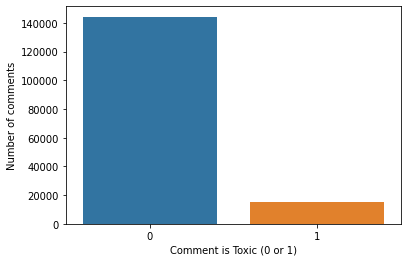

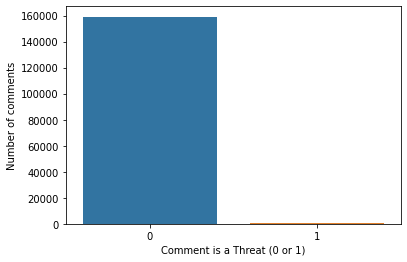

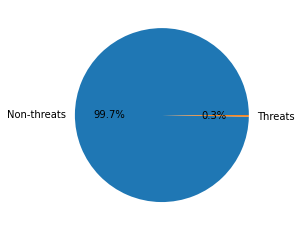

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a bar plot showing the count of toxic and non-toxic comments
sns.countplot(x="toxic", data=df)
plt.xlabel("Comment is Toxic (0 or 1)")
plt.ylabel("Number of comments")
plt.show()


# Plot a bar plot showing the count of threat and non-threat comments
sns.countplot(x="threat", data=df)
plt.xlabel("Comment is a Threat (0 or 1)")
plt.ylabel("Number of comments")
plt.show()


# Create a pie chart showing the distribution of threats and non-threats
threats = df["threat"]
labels = ["Non-threats", "Threats"]
sizes = threats.value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Display the plot
plt.show()


## Generating a WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
79        Hi! I am back again!\nLast warning!\nStop undo...
176       I think that your a Fagget get a oife and burn...
600       I'm also a sock puppet of this account...SUPRI...
802       Fuck you, Smith. Please have me notified when ...
1017      WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'L...
                                ...                        
157718    bitch \nyou are a fucking hore. you suck dick ...
158717    stupid head \n\nYOur dumb and you are stupid d...
158856    Hey \n\nhey faggot, are you dead yet? or are y...
159029                                  Death to Musulmans!
159400    Shalom \n\nSemite, get the fuck out of here. I...
Name: comment_text, Length: 478, dtype: object


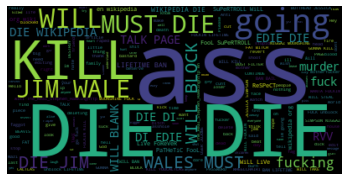

In [83]:
# Install the wordcloud library if it is not already installed
!pip install wordcloud

# Import the necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the dataset and select the comments in the "threat" category
threat_comments = df[df["threat"] == 1]["comment_text"]
print(threat_comments)

# Join all comments into one string 
comments = " ".join(threat_comments)

# Create a wordcloud from the string
wordcloud = WordCloud().generate(comments)

# Display
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

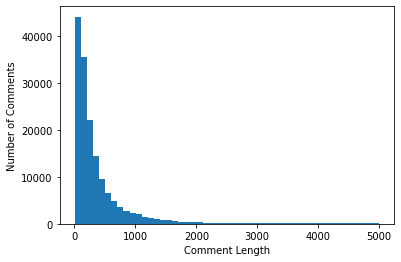

In [84]:
# Additional plot: Historgram

# Calculate the length of each comment
comment_lengths = df['comment_text'].apply(len)

# Plot a histogram of the lengths
plt.hist(comment_lengths, bins=50)
plt.xlabel("Comment Length")
plt.ylabel("Number of Comments")
plt.show()

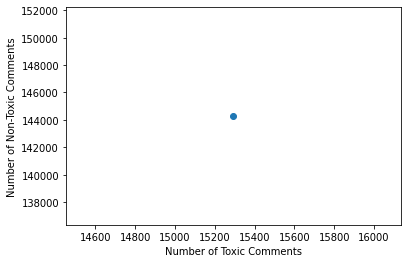

In [85]:
# Additional plot: Scatterplot
# Get the number of toxic and non-toxic comments
toxic_count = df[df['toxic'] == 1]['toxic'].count()
non_toxic_count = df[df['toxic'] == 0]['toxic'].count()

# Create a scatter plot
plt.scatter(toxic_count, non_toxic_count)
plt.xlabel("Number of Toxic Comments")
plt.ylabel("Number of Non-Toxic Comments")
plt.show()

### Data cleaning & Processing

In [86]:
# Take the two columns important to us. comment_text which includes the comment
# and the threat which is our y and what we will try to predict.
X = df["comment_text"]
y = df["threat"]
print(X)


0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object


a. Drop missing values

In [87]:
# Remove rows with missing values
df.dropna(inplace=True)
X = df["comment_text"]
print(X)

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object


In [88]:
# Remove very short comments
X = X[X.apply(len) > 10]

b. Remove punctuation

In [89]:
X = df['comment_text'].str.replace('[^\w\s]','')
print("Punctuation removed")
print(X)

<ipython-input-89-8c9071ab8fea>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  X = df['comment_text'].str.replace('[^\w\s]','')


Punctuation removed
0         Explanation\nWhy the edits made under my usern...
1         Daww He matches this background colour Im seem...
2         Hey man Im really not trying to edit war Its j...
3         \nMore\nI cant make any real suggestions on im...
4         You sir are my hero Any chance you remember wh...
                                ...                        
159566    And for the second time of asking when your vi...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm theres no actual article for p...
159569    And it looks like it was actually you who put ...
159570    \nAnd  I really dont think you understand  I c...
Name: comment_text, Length: 159571, dtype: object


c. Lowercase values

In [90]:
# Convert to lowercase
X = X.str.lower()
print("All lowercase now")
print(X)

All lowercase now
0         explanation\nwhy the edits made under my usern...
1         daww he matches this background colour im seem...
2         hey man im really not trying to edit war its j...
3         \nmore\ni cant make any real suggestions on im...
4         you sir are my hero any chance you remember wh...
                                ...                        
159566    and for the second time of asking when your vi...
159567    you should be ashamed of yourself \n\nthat is ...
159568    spitzer \n\numm theres no actual article for p...
159569    and it looks like it was actually you who put ...
159570    \nand  i really dont think you understand  i c...
Name: comment_text, Length: 159571, dtype: object


### d. Remove stop words

In [91]:
import nltk
import pandas as pd
nltk.download('stopwords') # For creating stopwords
nltk.download('punkt') # For tokenizing later

# Remove stop words
stop_words = nltk.corpus.stopwords.words('english')
X = X.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
print('Removed stop words')
print(X)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Removed stop words
0         explanation edits made username hardcore metal...
1         daww matches background colour im seemingly st...
2         hey man im really trying edit war guy constant...
3         cant make real suggestions improvement wondere...
4                       sir hero chance remember page thats
                                ...                        
159566    second time asking view completely contradicts...
159567       ashamed horrible thing put talk page 128611993
159568    spitzer umm theres actual article prostitution...
159569    looks like actually put speedy first version d...
159570    really dont think understand came idea bad rig...
Name: comment_text, Length: 159571, dtype: object


### e. Tokenize text


In [92]:
# Tokenize
X = X.apply(nltk.word_tokenize)
print("Tokenized data")
print(X)

Tokenized data
0         [explanation, edits, made, username, hardcore,...
1         [daww, matches, background, colour, im, seemin...
2         [hey, man, im, really, trying, edit, war, guy,...
3         [cant, make, real, suggestions, improvement, w...
4                [sir, hero, chance, remember, page, thats]
                                ...                        
159566    [second, time, asking, view, completely, contr...
159567    [ashamed, horrible, thing, put, talk, page, 12...
159568    [spitzer, umm, theres, actual, article, prosti...
159569    [looks, like, actually, put, speedy, first, ve...
159570    [really, dont, think, understand, came, idea, ...
Name: comment_text, Length: 159571, dtype: object


### Stem words

In [93]:
stemmer = nltk.stem.PorterStemmer()
# stemmer = nltk.stem.SnowballStemmer('english')

# Must add this to avoid recursion errors since some words cause problems in English.
def stem_words(words):
    stemmed_words = []
    for word in words:
        try:
            stemmed_word = stemmer.stem(word)
            stemmed_words.append(stemmed_word)
        except RecursionError:
            # Skip the word that caused the error
            pass
    return stemmed_words

X = X.apply(stem_words)
print("Stemmed words", X)

# Rejoin the stemmed words into a single string
X = X.apply(lambda x: ' '.join(x))

Stemmed words 0         [explan, edit, made, usernam, hardcor, metalli...
1         [daww, match, background, colour, im, seemingl...
2         [hey, man, im, realli, tri, edit, war, guy, co...
3         [cant, make, real, suggest, improv, wonder, se...
4                    [sir, hero, chanc, rememb, page, that]
                                ...                        
159566    [second, time, ask, view, complet, contradict,...
159567    [asham, horribl, thing, put, talk, page, 12861...
159568    [spitzer, umm, there, actual, articl, prostitu...
159569    [look, like, actual, put, speedi, first, versi...
159570    [realli, dont, think, understand, came, idea, ...
Name: comment_text, Length: 159571, dtype: object


### Remove High frequency and Low frequency words

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Remove high frequency words and low frequency words, with min_df = 5 and max_df = 0.5
vectorizer = TfidfVectorizer(min_df=5, max_df=0.5)
X = vectorizer.fit_transform(X)
print(X)

  (0, 20476)	0.24215348035081574
  (0, 12615)	0.11445474413211287
  (0, 22049)	0.13788430542765015
  (0, 17972)	0.08914714240355574
  (0, 23635)	0.09707342993815163
  (0, 23892)	0.17285507264336267
  (0, 20298)	0.12177332377095078
  (0, 8343)	0.10417669840044645
  (0, 18749)	0.10077350177813897
  (0, 9579)	0.25257452490922416
  (0, 8307)	0.32165926861584543
  (0, 27365)	0.2186934025904158
  (0, 16825)	0.13593174573906255
  (0, 25943)	0.19225341087939657
  (0, 10633)	0.21310728880636834
  (0, 6207)	0.2887801958791893
  (0, 25590)	0.13731934947571897
  (0, 26266)	0.23388257847473964
  (0, 20512)	0.1391660937149478
  (0, 9679)	0.2045648746291948
  (0, 15743)	0.3272319206369358
  (0, 11650)	0.2872555836431244
  (0, 25471)	0.1975081511493495
  (0, 15093)	0.13508616917257146
  (0, 8732)	0.09794655383111618
  :	:
  (159568, 2323)	0.1812843130327502
  (159569, 19582)	0.31696382295080455
  (159569, 25728)	0.37927824586151476
  (159569, 14653)	0.22244061038172255
  (159569, 14863)	0.541608131960

### Model & Techniques

In [95]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Load the dataset
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df["comment_text"], y, test_size=0.2)

# Define the model
model = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LogisticRegression())
])

# Fit the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = model.score(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

Test Accuracy: 1.00


In [96]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Precision: 0.79
Recall: 0.12
F1 Score: 0.21


In [97]:
# ATTEMPT DOWNSAMPLING MAJORITY as as olution (non-threats) and retraining. need to 
# preprocess again
from sklearn.utils import resample


df_majority = df[df['threat'] == 0]
df_minority = df[df['threat'] == 1]

# Downsample majority
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

# Combine both now
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

X = df_downsampled["comment_text"]
y = df_downsampled["threat"]

# Convert to lowercase
X = X.str.lower()
print("All lowercase now")
print(X)

# Remove stop words
stop_words = nltk.corpus.stopwords.words('english')
X = X.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
print('Removed stop words')
print(X)


# Tokenize. IF TOKENIZING WITH THIS, doesnt work, if using tfid vectorizer, works. Not sure why.
# X = X.apply(nltk.word_tokenize)
# print("Tokenized data")
# print(X)

# Split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model and pipeline
model = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LogisticRegression())
])

# Fit model with downsampled data
model.fit(X_train, y_train)

# Evaluate
accuracy = model.score(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

All lowercase now
5218      o rly? \n\ni was refering to the page, not you...
59483     block\nwhat's wrong ass-fuckers?  you can't ta...
9416      "\n\n will arbitration finally be needed to st...
67344     "\nthe reviewer was in error, it was not a coo...
800              ditto - congrats, and all the best to you!
                                ...                        
157718    bitch \nyou are a fucking hore. you suck dick ...
158717    stupid head \n\nyour dumb and you are stupid d...
158856    hey \n\nhey faggot, are you dead yet? or are y...
159029                                  death to musulmans!
159400    shalom \n\nsemite, get the fuck out of here. i...
Name: comment_text, Length: 956, dtype: object
Removed stop words
5218           rly? refering page, you. think type, please.
59483     block what's wrong ass-fuckers? can't take lit...
9416      " arbitration finally needed stop bigoted atta...
67344     " reviewer error, cooling block. 24 hour block...
800             

In [98]:
print("Number of rows after undersampling:", len(df_downsampled))
print("Number of threats after undersampling: ", len(df_downsampled[df_downsampled['threat']==1]))

Number of rows after undersampling: 956
Number of threats after undersampling:  478


In [99]:
# Get evaluation of Logistic Regression after downsampling with new accuracy of 90%
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict
y_pred = model.predict(X_test)

# Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Test Accuracy: {accuracy:.2f}')

Precision: 0.95
Recall: 0.87
F1 Score: 0.91
Test Accuracy: 0.91


In [109]:
# Test with one sentence...
sentence = ["hooray"]

# Make a prediction using the model
prediction = model.predict(sentence)

# Print the prediction (0 for not threat, 1 for threat)
print('Sentence is a threat?: ', prediction)

# probability = model.predict_proba(sentence)[0][1]
# print('Confidence: ', probability)

Sentence is a threat?:  [0]


In [101]:
# Test with one sentence...
sentence = [""]

# Make a prediction using the model
prediction = model.predict(sentence)

# Print the prediction (0 for not threat, 1 for threat)
print('Sentence is a threat?: ', prediction)

probability = model.predict_proba(sentence)[0][1]
print('Confidence: ', probability)

Sentence is a threat?:  [1]
Confidence:  0.5705935784689734


In [102]:
# NOW TRY SVM

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model
model = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', SVC())
])

# Fit the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = model.score(X_test, y_test)


print(f'Test Accuracy: {accuracy:.2f}')


Test Accuracy: 0.89


In [103]:
# SVC metrics

from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Test Accuracy: {accuracy:.2f}')

Precision: 0.91
Recall: 0.86
F1 Score: 0.88
Test Accuracy: 0.89


In [110]:
# Test SVC with one sentence...
sentence = ["i want to cry"]

# Make a prediction using the model
prediction = model.predict(sentence)

# Print the prediction (0 for not threat, 1 for threat)
print('Sentence is a threat?: ', prediction)

# probability = model.predict_proba(sentence)[0][1]
# print('Confidence: ', probability)

Sentence is a threat?:  [0]


In [111]:
# Test SVC with one sentence...
sentence = ["i want to cry and beat you up"]

# Make a prediction using the model
prediction = model.predict(sentence)

# Print the prediction (0 for not threat, 1 for threat)
print('Sentence is a threat?: ', prediction)

# probability = model.predict_proba(sentence)[0][1]
# print('Confidence: ', probability)

Sentence is a threat?:  [1]


In [112]:
# Test SVC with one sentence...
sentence = ["Hi mom"]

# Make a prediction using the model
prediction = model.predict(sentence)

# Print the prediction (0 for not threat, 1 for threat)
print('Sentence is a threat?: ', prediction)

# probability = model.predict_proba(sentence)[0][1]
# print('Confidence: ', probability)

Sentence is a threat?:  [0]
